## Transfer Learning

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Simple CNN Model

We're building a simple CNN model for comparison purposes. I'll skip the explanation here as I have covered this already in another lecture and notebook.

In [19]:
import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

random_indices_train = np.random.choice(train_images.shape[0], 5000, replace=False)
random_indices_test = np.random.choice(test_images.shape[0], 1000, replace=False)

# Extract the random 1k samples
train_images_sampled = train_images[random_indices_train]
test_images_sampled = test_images[random_indices_test]

train_labels_sampled = train_labels[random_indices_train]
test_labels_sampled = test_labels[random_indices_test]

train_labels = to_categorical(train_labels_sampled)
test_labels = to_categorical(test_labels_sampled)

train_images.min(), train_images.max()

(-1.0, 1.0)

In [20]:
train_labels.shape, test_labels.shape

((5000, 10), (1000, 10))

### Building the model

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,450 (349.41 KB)

 Trainable params: 89,450 (349.41 KB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.2161 - loss: 2.1031 - val_accuracy: 0.3230 - val_loss: 1.7735
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.3824 - loss: 1.6697 - val_accuracy: 0.4320 - val_loss: 1.5616
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.4723 - loss: 1.4602 - val_accuracy: 0.4810 - val_loss: 1.4804
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.5282 - loss: 1.3162 - val_accuracy: 0.4910 - val_loss: 1.4157
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5646 - loss: 1.2118 - val_accuracy: 0.4970 - val_loss: 1.3949
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.5980 - loss: 1.1230 - val_accuracy: 0.5150 - val_loss: 1.4025
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6402 - loss: 1.0218 - val_accuracy: 0.5140 - val_loss: 1.4505
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6794 - loss: 0.9402 - val_acc

### Performance Evaluation

We can see that we have achieved around 52% test accuracy with a simple CNN model.

32/32 - 0s - 10ms/step - accuracy: 0.5200 - loss: 1.5476


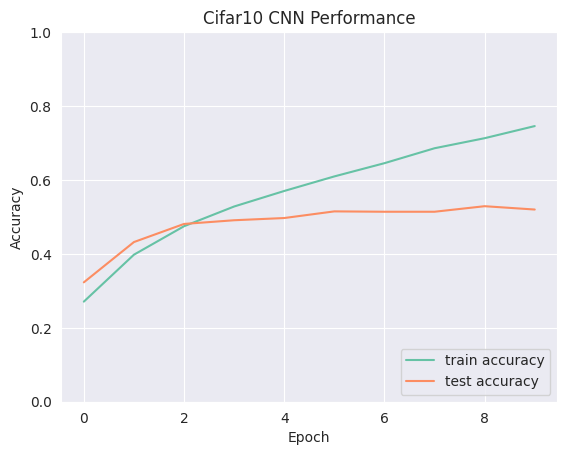

In [28]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Cifar10 CNN Performance')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Introduction to Transfer Learning

Transfer learning leverages features from a model trained on one problem to tackle a related task—like using cat breed detection model to help identify other feline creatures such as lion and tiger. This approach is especially useful when data is limited, making training a full model from scratch impractical.

In [29]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Resize images to 96x96 for better performance
train_images = np.array(tf.image.resize(train_images_sampled, (96, 96)))
test_images = np.array(tf.image.resize(test_images_sampled, (96, 96)))

# Match the preprocessing in the base model
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

train_images.min(), train_images.max()

(-1.0, 1.0)

In [30]:
train_images.shape

(5000, 96, 96, 3)

In [31]:
train_labels.shape, test_labels.shape

((5000, 10), (1000, 10))

### Transfer learning workflow

The typical workflow in deep learning transfer learning involves:

- `Reusing Pre-trained Model`: Import layers and weights from an already trained model.
- `Freezing`: Lock these layers to preserve their learned information. We set `trainable = False`.
- `Adding New Layers`: Stack new, trainable layers on top of the base model that adapt the existing features to predictions on your specific dataset.
- `Fine-tuning (Optional)`: Unfreeze part (or all) of the model and training it on new data with a low learning rate. This can further refine features, enhancing performance for the new task.
- `Training on New Data`: Train the new model on your dataset.

### Building our base model: MobileNetV2

I'll be using <a href="https://keras.io/api/applications/mobilenet/">MobileNetV2 base model</a> in this notebook as it is very lightweight and Google Colaboratorys memory limit can handle it. This is also one of the available pre-trained models in Keras. Normally, I'd make use of more powerful ones.

In [32]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

HEIGHT = 96
WIDTH = 96

base_model = MobileNetV2(weights='imagenet',
                      include_top=False,
                      input_shape=(HEIGHT, WIDTH, 3),
                      classes=train_labels.shape[1])

base_model.summary(show_trainable=True)

Model: "mobilenetv2_1.00_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_8          │ (None, 96, 96, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1 (Conv2D)         │ (None, 48, 48, 32)   │          864 │ input_layer_8[0][0] │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ bn_Conv1               │ (None, 48, 48, 32)   │          128 │ Conv1[0][0]         │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1_relu (ReLU)      │ (None, 48, 48, 32)   │            0 │ bn_Conv1[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 48, 48, 32)   │          288 │ Conv1_relu[0][0]    │    Y    │
│ (DepthwiseConv2D)      │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 48, 48, 32)   │          128 │ expanded_conv_dept… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 48, 48, 32)   │            0 │ expanded_conv_dept… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project  │ (None, 48, 48, 16)   │          512 │ expanded_conv_dept… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project… │ (None, 48, 48, 16)   │           64 │ expanded_conv_proj… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand         │ (None, 48, 48, 96)   │        1,536 │ expanded_conv_proj… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_BN      │ (None, 48, 48, 96)   │          384 │ block_1_expand[0][… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_relu    │ (None, 48, 48, 96)   │            0 │ block_1_expand_BN[… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_pad            │ (None, 49, 49, 96)   │            0 │ block_1_expand_rel… │    -    │
│ (ZeroPadding2D)        │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_depthwise      │ (None, 24, 24, 96)   │          864 │ block_1_pad[0][0]   │    Y    │
│ (DepthwiseConv2D)    

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

### Input Data Preprocessing

1. We will be resizing out input images because `MobileNetV2` works better with higher resolution images.

2. We will preprocess the input to match the base model.

In [37]:
# Resize images to 96x96 for better performance
train_images = np.array(tf.image.resize(train_images_sampled, (96, 96)))
test_images = np.array(tf.image.resize(test_images_sampled, (96, 96)))

# Match the preprocessing in the base model
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

train_images.min(), train_images.max()

(-1.0, 1.0)

In [38]:
train_images.shape

(5000, 96, 96, 3)

In [39]:
train_labels.shape, test_labels.shape

((5000, 10), (1000, 10))


### Freezing layers and fine-tuning

Layers & models have three weight attributes:

1. `weights` is the list of all weights variables of the layer.
2. `trainable_weights` is the list of those that are meant to be updated (via gradient descent) to minimize the loss during training.
3. `non_trainable_weights` is the list of those that aren't meant to be trained. Typically they are updated by the model during the forward pass.
Example: the Dense layer has 2 trainable weights (kernel & bias)

Also including here the code snippet that you can use if you want to retrain specific layers of the base model (fine-tuning) for future reference.

```python
base_model.trainable = False

# Set a specific layer by name to be trainable
layer_names = ['Conv_1']  # Replace with your target layer's name
for layer in base_model.layers:
    if layer.name in layer_names:
        layer.trainable = True
        print(f"Layer {layer.name} set to trainable")

base_model.summary(show_trainable=True)
```

We have added a few layers after the base model so that it can adapt to our new dataset.

In [33]:
base_model.trainable = False

inputs = keras.Input(shape=(HEIGHT, WIDTH, 3))

# Ensure that the base_model is running in inference mode by passing `training=False`.
x = base_model(inputs, training=False)

x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)

# A Dense classifier with 10 outputs (multi-class classification)
outputs = keras.layers.Dense(10, activation=('softmax'))(x)
model = keras.Model(inputs, outputs)
model.summary(show_trainable=True)

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_9 (InputLayer)          │ (None, 96, 96, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mobilenetv2_1.00_96 (Functional)    │ (None, 3, 3, 1280)           │     2,257,984 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten_7 (Flatten)                 │ (None, 11520)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout_4 (Dropout)                 │ (None, 11520)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_17 (Dense)                    │ (None, 128)                  │     1,474,688 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_18 (Dense)                    │ (None, 64)                   │         8,256 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_19 (Dense)                    │ (None, 10)                   │           650 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 3,741,578 (14.27 MB)

 Trainable params: 1,483,594 (5.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Training the model

In [34]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.6439 - loss: 1.2454 - val_accuracy: 0.7900 - val_loss: 0.6667
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 227ms/step - accuracy: 0.8817 - loss: 0.3381 - val_accuracy: 0.7720 - val_loss: 0.7688
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 214ms/step - accuracy: 0.9185 - loss: 0.2324 - val_accuracy: 0.8100 - val_loss: 0.6989
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 252ms/step - accuracy: 0.9398 - loss: 0.1738 - val_accuracy: 0.8000 - val_loss: 0.8381
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.9617 - loss: 0.1032 - val_accuracy: 0.8240 - val_loss: 0.7428
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9722 - loss: 0.0757 - val_accuracy: 0.8230 - val_loss: 0.7621
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.9785 - loss: 0.0586 - val_accuracy: 0.8300 - val_loss: 0.8361
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9896 - loss: 0

### Performance Evaluation

We can see that our train and test set accuracies are much higher than the manually trained CNN model.

32/32 - 6s - 195ms/step - accuracy: 0.8170 - loss: 1.0502


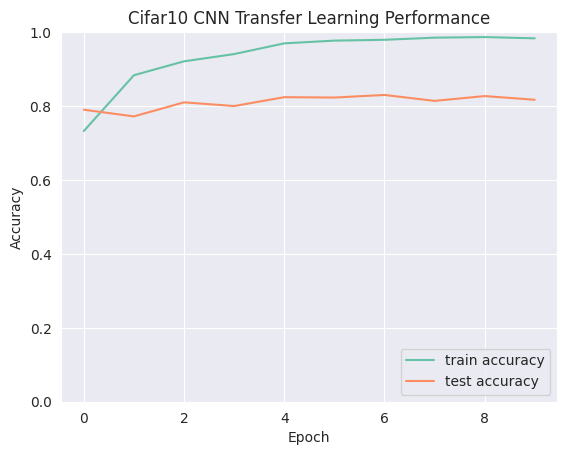

In [35]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Cifar10 CNN Transfer Learning Performance')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## References

1. https://keras.io/guides/transfer_learning/

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
